Problem-1

# You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")


In [2]:
election=pd.read_excel(r"C:\Users\sruth\Downloads\Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [3]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [4]:
election.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1521,Conservative,67,5,3,2,4,11,3,male
1522,Conservative,73,2,2,4,4,8,2,male
1523,Labour,37,3,3,5,4,2,2,male
1524,Conservative,61,3,3,1,4,11,2,male
1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [6]:
election.shape

(1525, 9)

In [7]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [9]:
election.nunique()

vote                        2
age                        70
economic.cond.national      5
economic.cond.household     5
Blair                       5
Hague                       5
Europe                     11
political.knowledge         4
gender                      2
dtype: int64

# Univariate Anlaysis:

In [10]:
cat=[]
num=[]
for i in election.columns:
    if election[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


<AxesSubplot:ylabel='vote'>

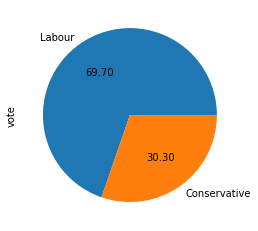

In [11]:
election['vote'].value_counts().plot(kind='pie',autopct='%.2f')

(array([272., 435., 389., 351.,  78.]),
 array([24. , 37.8, 51.6, 65.4, 79.2, 93. ]),
 <BarContainer object of 5 artists>)

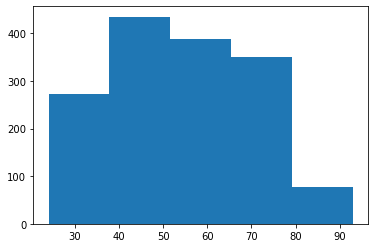

In [12]:
plt.hist(election['age'],bins=5)

<AxesSubplot:xlabel='age', ylabel='Density'>

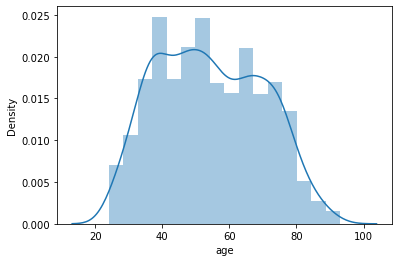

In [13]:
sns.distplot(election['age'],kde=True)

# Bivariate Analysis & Multivariate Analysis:

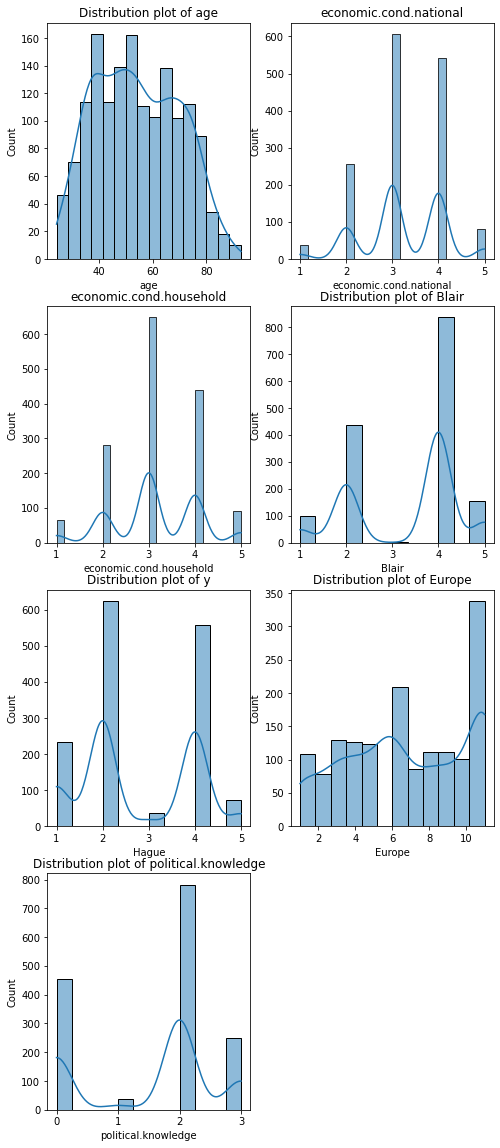

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(8,20))
plt.subplot(4,2,1)
sns.histplot(election['age'], kde=True)
plt.title('Distribution plot of age')

plt.subplot(4,2,2)
sns.histplot(election['economic.cond.national'], kde=True)
plt.title('economic.cond.national')

plt.subplot(4,2,3)
sns.histplot(election['economic.cond.household'], kde=True)
plt.title('economic.cond.household')

plt.subplot(4,2,4)
sns.histplot(election['Blair'], kde=True)
plt.title('Distribution plot of Blair')

plt.subplot(4,2,5)
sns.histplot(election['Hague'], kde=True)
plt.title('Distribution plot of y')

plt.subplot(4,2,6)
sns.histplot(election['Europe'], kde=True)
plt.title('Distribution plot of Europe')

plt.subplot(4,2,7)
sns.histplot(election['political.knowledge'], kde=True)
plt.title('Distribution plot of political.knowledge')

plt.show()
plt.tight_layout()

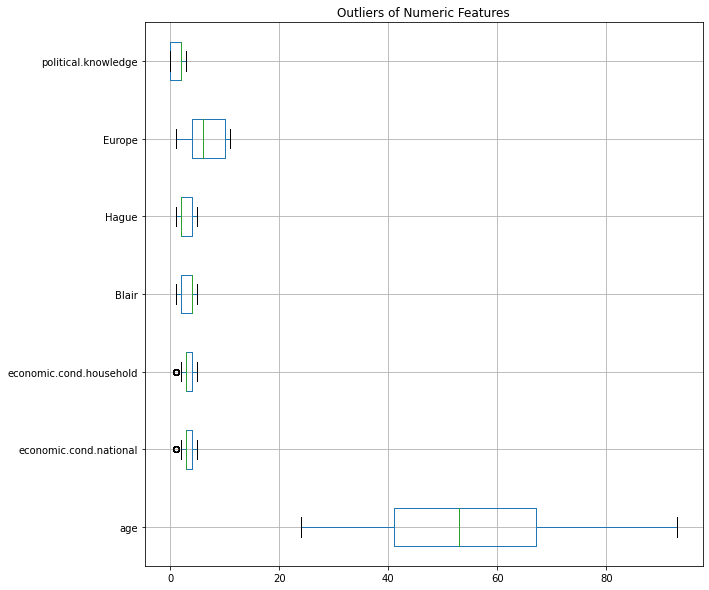

In [15]:
plt.figure(figsize=(10,10))
election[num].boxplot(vert=0)
plt.title('Outliers of Numeric Features')
plt.show()

In [16]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3=np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5*IQR)
    upper_Range = Q3+(1.5*IQR)
    return lower_range, upper_Range

In [17]:
for column in election[num].columns:
    lr, ur = remove_outliers(election[column])
    election[column] = np.where(election[column]>ur, ur, election[column])
    election[column] = np.where(election[column]<lr, lr, election[column])

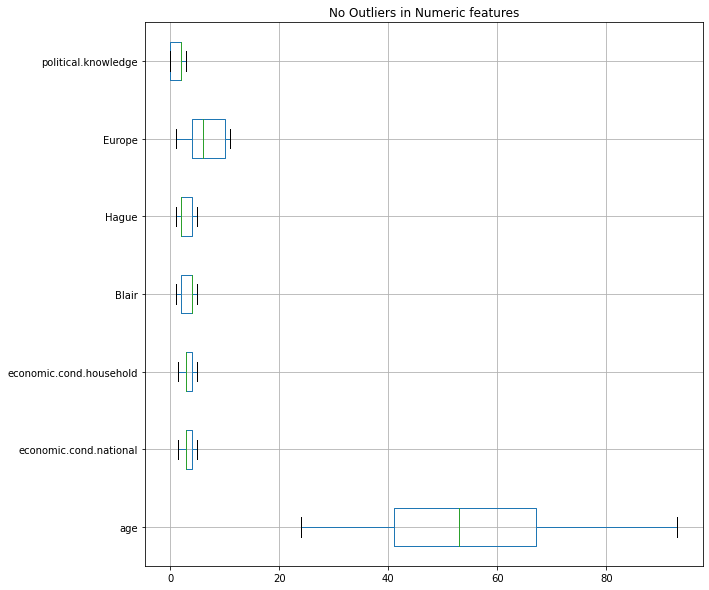

In [18]:
plt.figure(figsize=(10,10))
election[num].boxplot(vert=0)
plt.title('No Outliers in Numeric features')
plt.show()

In [19]:
election.skew()

age                        0.144621
economic.cond.national    -0.072349
economic.cond.household    0.086170
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [20]:
election.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.022194,-0.047149,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.022194,1.000000,0.342942,0.324402,-0.198091,-0.206858,-0.029395
economic.cond.household,-0.047149,0.342942,1.000000,0.216123,-0.101243,-0.114202,-0.039803
Blair,0.030218,0.324402,0.216123,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.198091,-0.101243,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.206858,-0.114202,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.029395,-0.039803,-0.020917,-0.030354,-0.152364,1.000000


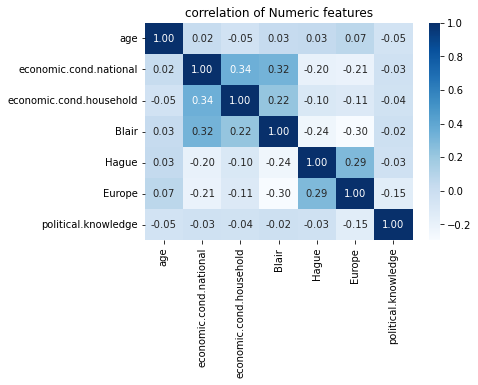

In [21]:

sns.heatmap(election.corr(),annot=True,fmt='.2f',cmap="Blues")
plt.title('correlation of Numeric features')
plt.show()           

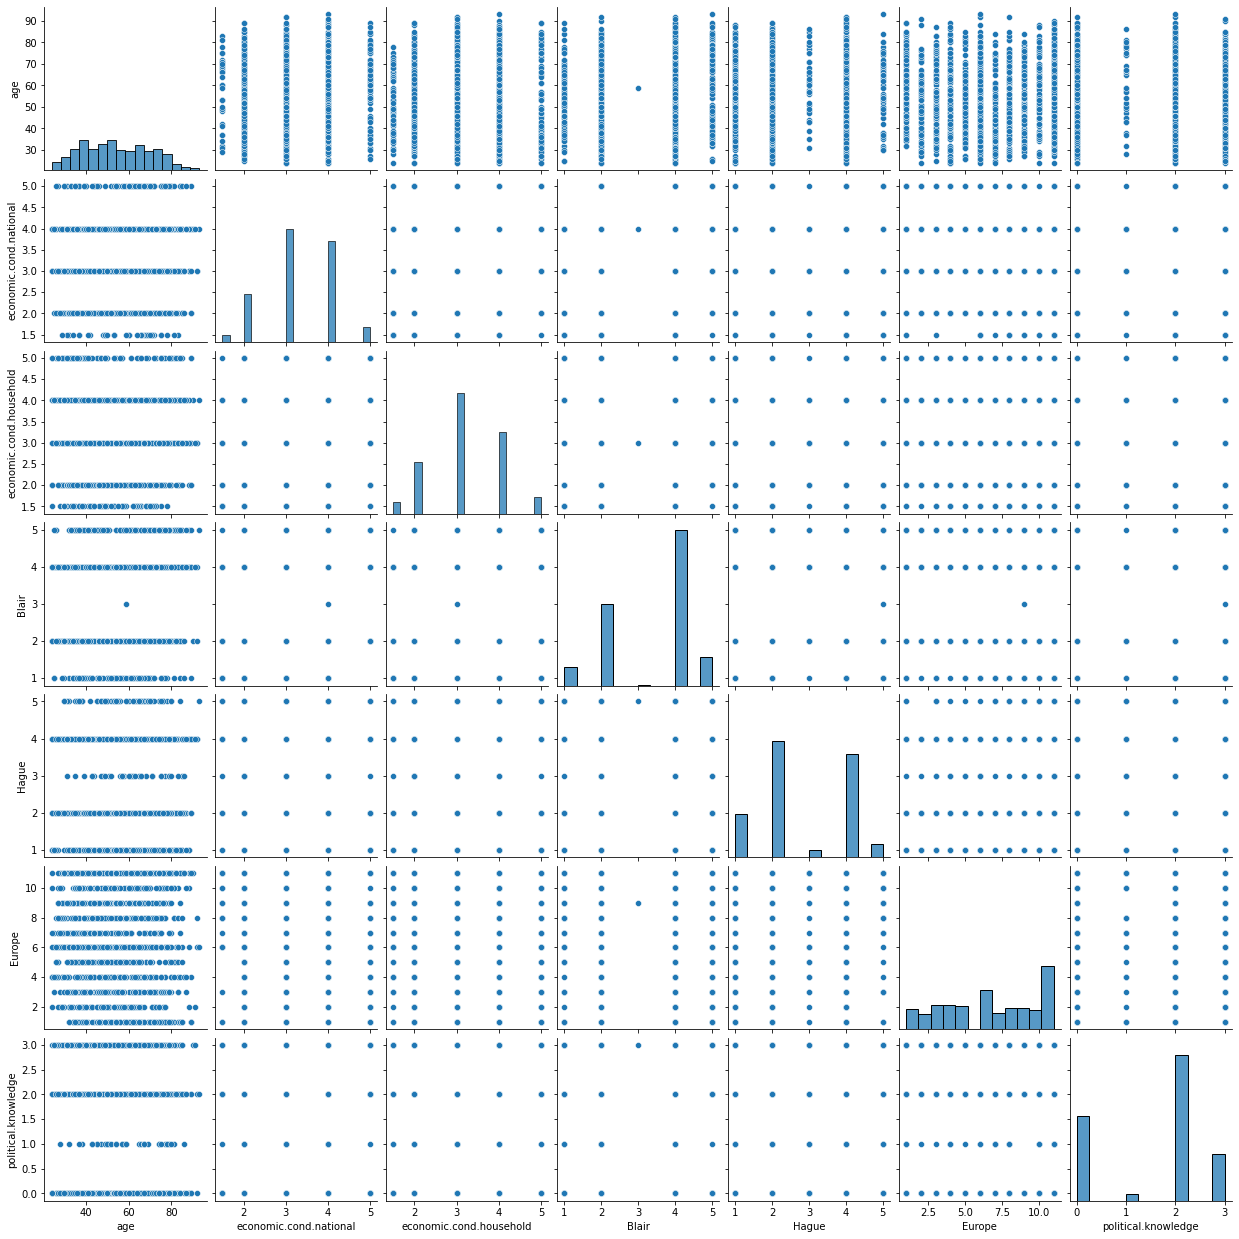

<AxesSubplot:xlabel='Blair', ylabel='age'>

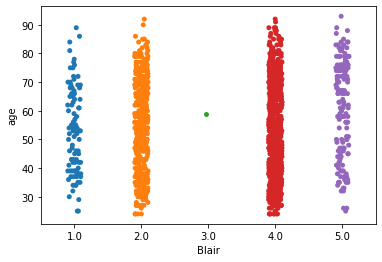

In [23]:
sns.stripplot(election["Blair"],election["age"])

<AxesSubplot:xlabel='Hague', ylabel='age'>

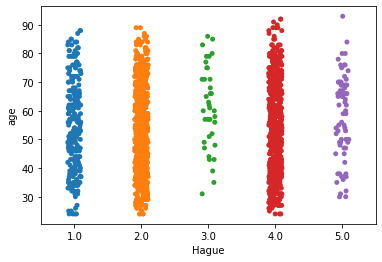

In [24]:
sns.stripplot(election["Hague"],election["age"])

<AxesSubplot:xlabel='economic.cond.household', ylabel='Blair'>

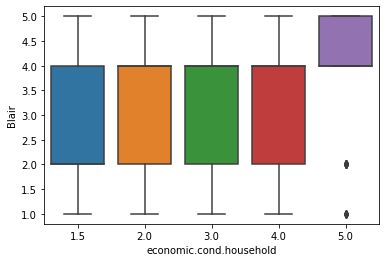

<AxesSubplot:xlabel='economic.cond.national', ylabel='Hague'>

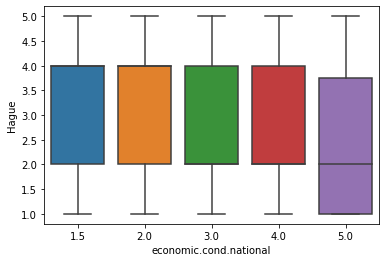

In [26]:
sns.boxplot(election['economic.cond.national'],election['Hague'])

<AxesSubplot:xlabel='economic.cond.household', ylabel='Blair'>

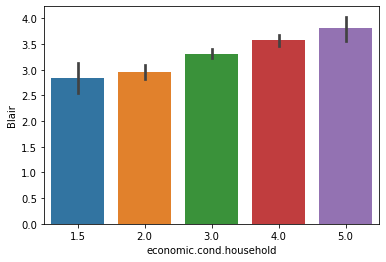

In [27]:
sns.barplot(election['economic.cond.household'],election['Blair'])

<AxesSubplot:xlabel='economic.cond.national', ylabel='Hague'>

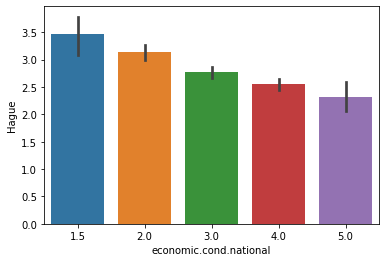

In [28]:
sns.barplot(election['economic.cond.national'],election['Hague'])

<AxesSubplot:xlabel='Hague', ylabel='Count'>

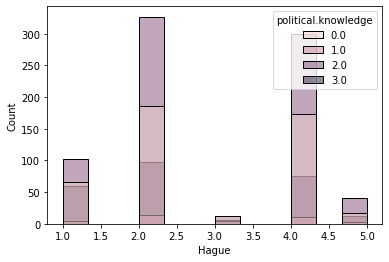

In [29]:
sns.histplot(data =election , x = "Hague", hue = "political.knowledge")

<AxesSubplot:xlabel='Blair', ylabel='Count'>

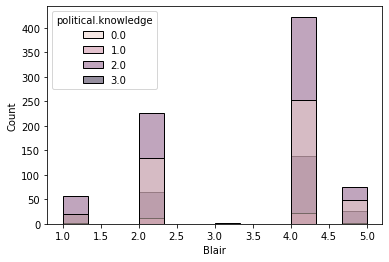

In [30]:
sns.histplot(data=election, x="Blair",hue='political.knowledge')

<AxesSubplot:xlabel='Blair', ylabel='Count'>

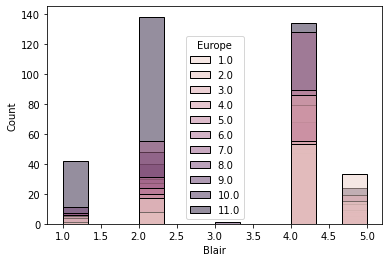

In [31]:
sns.histplot(data=election,x = "Blair", hue = "Europe")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

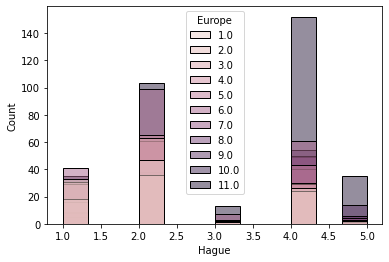

In [32]:
sns.histplot(data=election, x = "Hague",hue ="Europe")

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

# Converting all objects to categorical codes

In [33]:
## Converting the 'salary' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [34]:
## Applying the created Label Encoder object for the gender variable.

election['gender'] = LE.fit_transform(election['gender'])



In [35]:
election['vote']=pd.Categorical(election['vote'])

In [36]:
election.dtypes

vote                       category
age                         float64
economic.cond.national      float64
economic.cond.household     float64
Blair                       float64
Hague                       float64
Europe                      float64
political.knowledge         float64
gender                        int32
dtype: object

In [37]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
2,Labour,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
3,Labour,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
4,Labour,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
5,Labour,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


In [38]:
election_dummy=pd.get_dummies(election,drop_first=True)

In [39]:
election_dummy.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_Labour
1,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0,1
2,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1,1
3,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1,1
4,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0,1
5,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1,1


Train_Test_Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x = election.drop("vote",axis = 1)
y = election.pop("vote")

In [42]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [43]:
y_train.value_counts()

Labour          735
Conservative    332
Name: vote, dtype: int64

In [44]:
y_test.value_counts()

Labour          328
Conservative    130
Name: vote, dtype: int64

In [45]:
from sklearn.linear_model import LogisticRegression

In [4]:
# Fit the Logistic Regression Model
lr=LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=2)

In [5]:
lr.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [48]:
#Predicting on Training and Test dataset
ytrain_predict=lr.predict(x_train)
ytest_predict=lr.predict(x_test)

In [49]:
ytest_predict_prob=lr.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.921946,0.078054
1,0.690526,0.309474
2,0.346669,0.653331
3,0.488887,0.511113
4,0.158897,0.841103


In [50]:
# Accuracy - Training Data
lr.score(x_train,y_train)

0.8406747891283973

In [51]:
# Accuracy - Test Data
lr.score(x_test, y_test)

0.8209606986899564

In [52]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [53]:
confusion_matrix(y_train, ytrain_predict)

array([[230, 102],
       [ 68, 667]], dtype=int64)

In [54]:
plot_confusion_matrix(model,x_train,y_train)

NameError: name 'model' is not defined

In [55]:
# Accuracy - Training Data
lr.score(x_test,y_test)

0.8209606986899564

In [56]:
confusion_matrix(y_test, ytest_predict)

array([[ 85,  45],
       [ 37, 291]], dtype=int64)

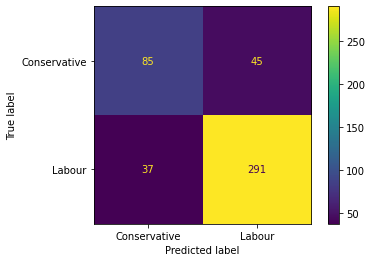

In [57]:
plot_confusion_matrix(lr,x_test,y_test)

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [59]:
#Build LDA Model
lda = LinearDiscriminantAnalysis()
lda=lda.fit(x_train,y_train)

In [60]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = lda.predict(x_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = lda.predict(x_test)

In [61]:
print(confusion_matrix(lda.predict(x_train),y_train))


[[236  75]
 [ 96 660]]


In [62]:
print(classification_report(lda.predict(x_train),y_train))

              precision    recall  f1-score   support

Conservative       0.71      0.76      0.73       311
      Labour       0.90      0.87      0.89       756

    accuracy                           0.84      1067
   macro avg       0.80      0.82      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [63]:
print(confusion_matrix(lda.predict(x_test),y_test))


[[ 86  39]
 [ 44 289]]


In [64]:
print(classification_report(lda.predict(x_test),y_test))

              precision    recall  f1-score   support

Conservative       0.66      0.69      0.67       125
      Labour       0.88      0.87      0.87       333

    accuracy                           0.82       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.82      0.82       458



In [65]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.889


ValueError: y_true takes value in {'Conservative', 'Labour'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [66]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.884


ValueError: y_true takes value in {'Conservative', 'Labour'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
GB = GaussianNB()
GB.fit(x_train, y_train)

GaussianNB()

In [69]:
GB=GB.fit(x_train,y_train)

In [70]:
print(confusion_matrix(GB.predict(x_train),y_train))


[[240  87]
 [ 92 648]]


In [71]:
print(classification_report(GB.predict(x_train),y_train))

              precision    recall  f1-score   support

Conservative       0.72      0.73      0.73       327
      Labour       0.88      0.88      0.88       740

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [72]:
GB=GB.fit(x_test,y_test)

In [73]:
print(confusion_matrix(GB.predict(x_test),y_test))

[[ 91  35]
 [ 39 293]]


In [74]:
print(classification_report(GB.predict(x_test),y_test))

              precision    recall  f1-score   support

Conservative       0.70      0.72      0.71       126
      Labour       0.89      0.88      0.89       332

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



In [75]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

NameError: name 'nb' is not defined

# Q6)Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [76]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(x_test)
model_score = NB_model.score(x_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

NameError: name 'NB_model' is not defined

In [77]:
NB_model.score(x_train, y_train)

NameError: name 'NB_model' is not defined

In [78]:
NB_model.score(x_train, y_train)

NameError: name 'NB_model' is not defined

In [79]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [81]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train)
model_score = KNN_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8622305529522024
[[246  86]
 [ 61 674]]
              precision    recall  f1-score   support

Conservative       0.80      0.74      0.77       332
      Labour       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



In [82]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7838427947598253
[[ 80  50]
 [ 49 279]]
              precision    recall  f1-score   support

Conservative       0.62      0.62      0.62       130
      Labour       0.85      0.85      0.85       328

    accuracy                           0.78       458
   macro avg       0.73      0.73      0.73       458
weighted avg       0.78      0.78      0.78       458



In [83]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [84]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train)
model_score = KNN_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8481724461105904
[[231 101]
 [ 61 674]]
              precision    recall  f1-score   support

Conservative       0.79      0.70      0.74       332
      Labour       0.87      0.92      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [85]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7969432314410481
[[ 78  52]
 [ 41 287]]
              precision    recall  f1-score   support

Conservative       0.66      0.60      0.63       130
      Labour       0.85      0.88      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.74      0.74       458
weighted avg       0.79      0.80      0.79       458



In [86]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [87]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train)
model_score = KNN_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8481724461105904
[[231 101]
 [ 61 674]]
              precision    recall  f1-score   support

Conservative       0.79      0.70      0.74       332
      Labour       0.87      0.92      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [88]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7969432314410481
[[ 78  52]
 [ 41 287]]
              precision    recall  f1-score   support

Conservative       0.66      0.60      0.63       130
      Labour       0.85      0.88      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.74      0.74       458
weighted avg       0.79      0.80      0.79       458



In [89]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.25764192139737996,
 0.21834061135371174,
 0.21615720524017468,
 0.20305676855895194,
 0.20742358078602618,
 0.2139737991266376,
 0.19432314410480345,
 0.18777292576419213,
 0.18558951965065507,
 0.1899563318777293]

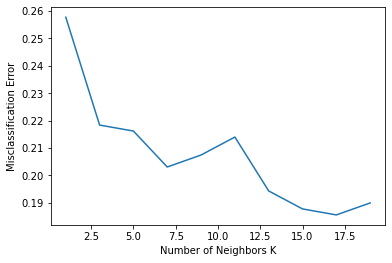

In [90]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()